[Accueil](../../../index.ipynb) > [Sommaire Premiere](../../index.ipynb) > [Réseau](index.ipynb)

# 6.2 Architecture matérielle et OS : réseau

## Généralités


<div class="alert alert-info">

**Définition**

Un réseau informatique est un ensemble d'équipements réliés entre eux afin de permettre des échanges d'informations.
</div>

<figure style="float:right">
    <img src="img/switch2.png"
         alt="un switch domestique"
         title="un switch domestique"
         >
    <figcaption>un switch domestique</figcaption>
</figure>

<figure style="float:right">
    <img src="img/switch.png"
         alt="Un switch professionnel"
         title="Un switch professionnel"
         >
    <figcaption>Un switch professionnel</figcaption>
</figure>

Un réseau informatique est composé:


- d'équipements informatiques
  - ordinateurs, imprimantes, objets connectés...
  - routeurs, hubs, switch
- de liaisons point-à point qui les relients entre eux
  - liaisons filaires : cables éthernet, fibre optique
  - liaisons herztiennes : wifi, 3G/4G/5G, satellite

Différence entre hub, switch et routeur


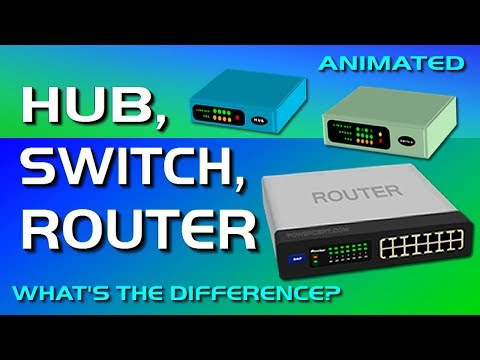

In [5]:
from IPython.display import YouTubeVideo
print('Différence entre hub, switch et routeur')
YouTubeVideo('1z0ULvg_pW8')

<figure style="float:right">
    <img src="img/fiber-optics.png"
         alt="Des fibres optiques"
         title="Des fibres optiques"
         >
    <figcaption>Des fibres optiques</figcaption>
</figure>

## Rappels 

L'année dernière, en SNT, nous avons étudié le réseau internet. Nous avons appris que:

- Tout ordinateur ou routeur connecté possède une **adresse IP**;
- Pour 'sortir' d'un réseau, un hôte du réseau doit avoir configuré sa **passerelle** (*gateway*);
- Il existe des **IP privés** (pour les LAN) et des **adresses publiques**;
- **Au sein d'un réseau, tout matériel doit avoir une IP unique**.

Cette année nous allons en apprendre davantage.

## IPV4 vs IPV6

- Une adresse IPV4 se définit sur **4 octets**, généralement indiqués sous forme de 4 nombres numérotés de 0 à 255 et séparés par un point : exemple 192.168.1.30;
- Une adresse IPV6 se définit sur **16 octets**, où les 8 groupes de 2 octets (16 bits par groupe) sont séparés par un signe deux-points : exemple 2001:0db8:0000:85a3:0000:0000:ac1f:8001.

<div class="alert alert-success">

**Exercice**:

1. Combien d'adresses IPv4, par mètre carré, peuvent exister sur Terre sachant que le rayon de la Terre est de 6400 km et la surface d'une sphère est $4\pi R^2$

2. Faire le calcul pour l'IPv6
</div>

Dans le reste de ce cours, nous parlerons **uniquement des IPv4**.


Il existe 3 plages d'adresses IP réservées pour les réseaux locaux:
 - 10.0.0.0 à 10.255.255.255 soit 16 777 216  adresses
 - 172.16.0.0 à 172.31.255.255 soit 1 048 576 adresses
 - 192.168.0.0 à 192.168.255.255 soit 65 536 adresses
 

## masque de sous-réseau

Dans une adresse IP, il est essentiel de séparer l'identité de l'hôte (*host Id*) de celle du réseau. Pour effectuer cette séparation on utilise un **masque** qui est indissociable de toute adresse IP.

<div class="alert alert-info">
Une adresse IP seule ne veut rien dire puisqu'on ne sait pas quelle est la partie réseau et quelle est la partie machine.
</div>

- Les masques de sous-réseau sont codés sur 4 octets, soit 32 bits.
- Dans une adresse IP, ils permettent de faire la séparation entre la partie réseau et la partie machine.
- La partie réseau est est représentée par des bits à 1 tandis que pour la machine ce sont des bits à 0.

**Exemple**

Voici un masque de sous-réseau:

<table>
    <thead>
    <tr>
        <th></th>
        <th colspan=3 style="border:1px solid black">Partie réseau</th>
        <th colspan=1 style="border:1px solid black">Partie Machine</th>
    </tr>
    </thead>
    <tbody>
    <tr style="border:1px solid black">
        <th>Représentation binaire</th>
        <td style="border:1px solid black">11111111</td>
        <td style="border:1px solid black">11111111</td>
        <td style="border:1px solid black">11111111</td>
        <td style="border:1px solid black">00000000</td>
    </tr>
    <tr style="border:1px solid black">
        <th>Représentation décimale</th><td style="border:1px solid black">255</td><td style="border:1px solid black">255</td><td style="border:1px solid black">255</td><td style="border:1px solid black">0</td>
    </tr>
    </tbody>
</table>

### Association avec une adresse IP

Prenons l'exemple d'une machine qui a pour IP **192.168.25.147** et appliquons lui le masque de sous réseau **255.255.255.0**.

Pour déterminer la partie réseau, on applique l'**opérateur logique &**

<table style="">
    <colgroup>
        <col style="border:1px solid black">
        <col span="8" style="border:1px solid black">
        <col span="8" style="border:1px solid black">
        <col span="8" style="border:1px solid black">
        <col span="8" style="border:1px solid black">
    </colgroup>
  <tr style="border:1px solid black">
      <th>Adresse IP en décimal</th>
      <td colspan=8>192</td>
      <td colspan=8>168</td>
      <td colspan=8>25</td>
      <td colspan=8>147</td>
  </tr>
  <tr style="border:1px solid black">
      <th>Masque en décimal</th>
      <td colspan=8>255</td>
      <td colspan=8>255</td>
      <td colspan=8>255</td>
      <td colspan=8>0</td>
  </tr>
  <tr style="border:1px solid black">
      <th style="border:1px solid black">IP binaire</th>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
  </tr>
  <tr style="border:1px solid black">
      <th style="border:1px solid black">Masque en binaire</th>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
  </tr>
  <tr style="border:1px solid black">
      <th style="border:1px solid black">Réseau = IP & Masque</th>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:green">1</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
      <td style="background-color:red">0</td>
  </tr>
  <tr style="border:1px solid black">
      <th>Réseau en décimal</th>
      <td colspan=8>192</td>
      <td colspan=8>168</td>
      <td colspan=8>25</td>
      <td colspan=8>0</td>
  </tr>
</table>

On obtient donc comme réseau : **192.168.25.0**

<div class="alert alert-info">

**Remarque**

Pour obtenir l'*host Id* on applique la formule $ {IP} \; \& \; \overline{masque}$

Ici on obtient 192.168.25.47 & 0.0.0.255 = 0.0.0.47

</div>

In [1]:
IP = [192,168,25,47]
mask = [255,255,255,0]
result =[str(i & m) for m, i in zip(mask, IP)]
network = ".".join(result)
print(f"L'adresse réseau est {network}")

L'adresse réseau est 192.168.25.0


### Adresses spécifiques

Il existe **deux adresses** spécifiques au sein d'un réseau :

1. La première plage désigne le **réseau** : elle est très importante car c'est grâce à elle qu'on peut router les informations d'un réseau à un autre.
2. La dernière est celle qui désigne le **broadcast** : elle permet la diffusion à toutes les machines du réseau.

Dans l'exemple précédent 192.168.25.0 est l'adresse du réseau et 192.168.25.255 est l'adresse du broadcast.

<div class="alert alert-info">
    
Dans un réseau dont le masque comporte n bits pour les hôtes, on pourra attribuer $2^n-2$ adresses IP. 

Dans l'exemple précédent on pourra attribuer $2^8-2=254$ adresses IP.
</div>

### Masques possibles

Pour créer des masques de sous-réseau on utilise, par soucis de **simplification**, des bits contigus.

La notation décimale **n'est pas vraiment adaptée au binaire**, on rencontre donc une autre notation qui est plus rapide à écrire : la notation [CIDR](https://en.wikipedia.org/wiki/Classless_Inter-Domain_Routing). Dans celle-ci on note le nombre de bits significatifs en décimal

<table>
    <thead>
        <tr>
            <th>Notation en binaire</th><th>Notation en décimal</th><th>Notation CIDR</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>11111111.11111111.11111111.11111110</td><td>255.255.255.254</td><td>/31</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.11111100</td><td>255.255.255.252</td><td>/30</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.11111000</td><td>255.255.255.248</td><td>/29</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.11110000</td><td>255.255.255.240</td><td>/28</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.11100000</td><td>255.255.255.224</td><td>/27</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.11000000</td><td>255.255.255.192</td><td>/26</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.10000000</td><td>255.255.255.128</td><td>/25</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111111.00000000</td><td>255.255.255.0</td><td>/24</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111110.00000000</td><td>255.255.254.0</td><td>/23</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111100.00000000</td><td>255.255.252.0</td><td>/22</td>
        </tr>
        <tr>
            <td>11111111.11111111.11111000.00000000</td><td>255.255.248.0</td><td>/21</td>
        </tr>
        <tr>
            <td>11111111.11111111.11110000.00000000</td><td>255.255.240.0</td><td>/20</td>
        </tr>
        <tr>
            <td>11111111.11111111.11100000.00000000</td><td>255.255.224.0</td><td>/19</td>
        </tr>
        <tr>
            <td>11111111.11111111.11000000.00000000</td><td>255.255.192.0</td><td>/18</td>
        </tr>
        <tr>
            <td>11111111.11111111.10000000.00000000</td><td>255.255.128.0</td><td>/17</td>
        </tr>
        <tr>
            <td>11111111.11111111.00000000.00000000</td><td>255.255.0.0</td><td>/16</td>
        </tr>
        <tr>
            <td>11111111.11111110.00000000.00000000</td><td>255.254.0.0</td><td>/15</td>
        </tr>
        <tr>
            <td>11111111.11111100.00000000.00000000</td><td>255.252.0.0</td><td>/14</td>
        </tr>
        <tr>
            <td>11111111.11111000.00000000.00000000</td><td>255.248.0.0</td><td>/13</td>
        </tr>
        <tr>
            <td>11111111.11110000.00000000.00000000</td><td>255.240.0.0</td><td>/12</td>
        </tr>
        <tr>
            <td>11111111.11100000.00000000.00000000</td><td>255.224.0.0</td><td>/11</td>
        </tr>
        <tr>
            <td>11111111.11000000.00000000.00000000</td><td>255.192.0.0</td><td>/10</td>
        </tr>
        <tr>
            <td>11111111.10000000.00000000.00000000</td><td>255.128.0.0</td><td>/9</td>
        </tr>
        <tr>
            <td>11111111.00000000.00000000.00000000</td><td>255.0.0.0</td><td>/8</td>
        </tr>
        <tr>
            <td>11111110.00000000.00000000.00000000</td><td>254.0.0.0</td><td>/7</td>
        </tr>
        <tr>
            <td>11111100.00000000.00000000.00000000</td><td>252.0.0.0</td><td>/6</td>
        </tr>
        <tr>
            <td>11111000.00000000.00000000.00000000</td><td>248.0.0.0</td><td>/5</td>
        </tr>
        <tr>
            <td>11110000.00000000.00000000.00000000</td><td>240.0.0.0</td><td>/4</td>
        </tr>
        <tr>
            <td>11100000.00000000.00000000.00000000</td><td>224.0.0.0</td><td>/3</td>
        </tr>
        <tr>
            <td>11000000.00000000.00000000.00000000</td><td>192.0.0.0</td><td>/2</td>
        </tr>
        <tr>
            <td>10000000.00000000.00000000.00000000</td><td>128.0.0.0</td><td>/1</td>
        </tr>
    </tbody>
 </table>
 
 
 Les écritures suivantes sont donc équivalentes:
 
- 192.168.1.132/255.255.0.0 et 192.168.1.132/16
- 192.168.1.1/255.255.255.0 et 192.168.1.1/24
- 10.0.0.10/255.0.0.0 et 10.0.0.10/8
- 10.0.0.10/255.255.255.248 et 10.0.0.10/29
 

### Choix d'un masque

Le choix de votre masque va dépendre du nombre de machines que vous voulez installer sur votre réseau.

Le nombre de machines possibles sur un réseau se calcule selon la formule:

$N\;=\;2^n-2$ où $n$ est le nombre de bits significatifs de votre masque.

**Exemple**

- On veut adresser 56 hôtes sur notre réseau;
- On ajoute les deux adresses spéciales cela fait donc 58 adresses;
- Or $2^6=64$;
- Il nous faut donc 6 bits pour la partie hôte et 18 pour la partie réseau ce qui donne le masque :
  - $11111111\;11111111\;11111111\;11000000$ en binaire;
  - 255.255.255.192 en décimal;
  - /18 avec la notation CIDR.
  
### Attribution des adresses IP

Une fois le masque déterminé, il est possible de choisir les adresses IP dans le réseau.

Admettons que nous désirons que nos adresses IP commencent par 192.168.1.X

Pour l'exemple de masque précédent, nous avons 4 plages possibles d'IP:

- de 0 à 63 exemple: 192.168.1.0 -> 192.168.1.63
- de 64 à 127 exemple: 192.168.1.64 -> 192.168.1.127
- de 128 à 191 exemple: 192.168.1.128 -> 192.168.1.191
- de 192 à 255 exemple: 192.168.1.192 -> 192.168.1.255

Pour résumer sous forme de tableau :

<table>
    <colgroup>
        <col>
        <col style="border:1px solid black">
        <col style="border:1px solid black">
    </colgroup>
    <thead>
    <tr>
        <td></td><th >Réseau</th><th>Broadcast</th>
    </tr>
    </thead>
    <tbody>
    <tr style="border:1px solid black">
        <th>Possibilité 1</th><td>192.168.1.0</td><td>192.168.1.63</td>
    </tr>
    <tr style="border:1px solid black">
        <th>Possibilité 2</th><td>192.168.1.64</td><td>192.168.1.127</td>
    </tr>
    <tr style="border:1px solid black">
        <th>Possibilité 3</th><td>192.168.1.128</td><td>192.168.1.191</td>
    </tr>
    <tr style="border:1px solid black">
        <th>Possibilité 4</th><td>192.168.1.192</td><td>192.168.1.255</td>
    </tr>
    </tbody>

</table>



## Les différents types de réseaux.

On peut distinguer les réseaux selon plusieurs critères:

### La taille

#### Les réseaux locaux

Certains réseaux sont limités à une salle (notre salle de cours par exemple), d'autres peuvent occuper un bâtiment ou ensemble de bâtiments (le réseau pédagogique de Saint-Louis par exemple). On parle dans ce cas de **réseaux locaux** (**L**ocal **A**rea **N**etwork : **LAN**).

On peut également parler de **PAN** (**P**ersonnal **A**rea **N**etwork) pour un réseau à l'échelle d'une habitation.

#### Les réseaux interconnectés

- **MAN** (**M**etropolitan **A**rea **N**etwork) à l'échelle d'une ville;
- **WAN** (**W**ide **A**rea **N**etwork), permettent de relier entre eux des réseaux locaux dans des villes différentes.

#### Les réseaux mondiaux

**Internet** (interconnection of networks) est parfois appelé le *réseau des réseaux* car il permet, à l'échelle mondiale, d'interconnecter les réseaux de grandes tailles.


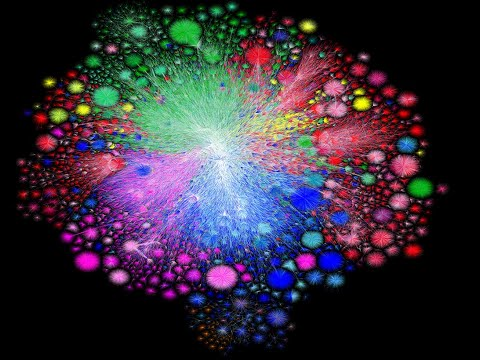

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('-L1Zs_1VPXA')
# source https://www.opte.org/

### La Topologie

La topologie d'un réseau correspond à son architecture physique.

<table>
    <thead>
    <th>Type</th><th></th><th>Description</th>
    </thead>
    <tbody>
        <tr>
            <td>Réseau en anneau</td><td><img src="img/ring_topology.png"></td><td>Les stations sont connectées en chaîne les unes aux autres et chaque station joue le rôle d'un intermédiaire. Si la communication est unidirectionnelel, la panne d'une station rompt l'anneau.</td>
        </tr>
        <tr>
            <td>Réseau hiérarchique</td><td><img src="img/tree_topology.png"></td><td>Egalement connu sous le nom de <b>structure arborescente</b>, ce type de topologie possède un point faible qui est la station mère : Si celle-ci tombe en panne, les deux sous-réseaux ne peuvent plus communiquer.</td>
        </tr>
        <tr>
            <td>Réseau en bus</td><td><img src="img/bus_topology.png"></td><td>Cette architecture est économique car il n'y a qu'un seul cablage par réseau. La panne d'une station n'impacte pas les autres, en revanche la défaillance du support entraîne l'arrêt total du réseau.</td>
        </tr>
        <tr>
            <td>Réseau en étoile</td><td><img src="img/star_topology.png"></td><td>C'est la topologie la plus utilisée dans les réseaux locaux. La panne d'une station ne perturbe pas les autres, en revanche la défaillance de l'équipement central ( le switch) rend l'ensemble du réseau inutilisable.</td>
        </tr>
        <tr>
            <td>Réseau en mailles</td><td><img src="img/fully_topology.png"></td><td>Cette topologie est utilisée dans le réseau internet. L'information peut parcourir le réseau selon divers chemins ce qui rend le réseau fortement tolérant aux pannes locales.</td>
        </tr>
    </tbody>
</table>

## Le Modèle OSI

Le modèle OSI (**O**pen **S**ystems **I**nterconnection), décrit les démarches et les concepts utilisés pour normaliser la connexion des systèmes informatiques. La création de ce modèle est née de la nécessité d'éviter des architectures hétérogènes et incompatibles donc l'**adoption de règles communes de communication**. Les premiers travaux datent de 1977 et la première norme (ISO IS7498) est écrite en 1978 et est adoptée en 1984 par les grands constructeurs européens puis américains.

<img style="float:right;margin:20px" src="img/7couches.png">

Cette norme décompose une connexion en **7 couches** et décrit les rôles de chacune.


Quelques caractéristiques de ces couches:

- Une couche par niveau d'abstraction;
- Une couche a des fonctions bien définies;
- Les frontières entre les couches doivent minimiser le flux d'information.
- Chaque couche dialogue avec son homologue distante ( Firefox s'adresse à un serveur Apache)
- Chaque couche est indépendante des autres couches. (Le fonctionnement de Firefox ne dépend pas de l'OS ni de la carte réseau, ni de la liaison fibre ou ethernet)

<div style="clear:both"></div>

### Les différentes couches

<img style="float:right;margin:20px" src="img/osi-7-couches-modele-osi.gif">

#### La couche 7 : application

Cette couche est connue de tout utilisateur de l'outil informatique puisqu'elle rassemble les applications : Navigateurs, traitement de texte... On y trouve les protocoles applicatifs comme le **http**, smtp, ftp... 

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_application)

#### La couche 6 : présentation

Cette couche s'intéresse à la syntaxe des données transmises. C'est dans cette couche qu'interviennent la compression/décompression et cryptage/décryptage des données.  

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_pr%C3%A9sentation)

#### La couche 5 : session

Cette couche permet **l'échange d'information au niveau d'une session**. Par exemple si, une authentification est nécessaire pour accéder à une session distante, la vérification du mot de passe s'effectuera une seule fois pendant la durée de la session. On trouve par exemple les protocoles ASP (AppleTalk Session Protocol), NetBIOS (partage de fichiers sous Windows)

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_session)

#### La couche 4 : transport

C'est à partir de cette couche qu'intervient **la mise en réseau**.

Cette couche est responsable du bon acheminement des messages complets au destinataire. Les messages de la couche session sont découpés en éléments plus petits puis sont passés à la couche suivante. Cette couche est également responsable du type de service de livraison (avec/sans garantie de reception, destinataire unique ou non).

On trouve à ce niveau les protocoles **TCP** et **UDP**.

L'unité d'information de la couche transport s'appelle le **segment**.

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_transport)

#### La couche 3 : réseau

Cette couche permet de gérer l'aspect d'interconnection des réseaux. On trouve à ce niveaux les protocole **IPV4 et IPV6**.

L’unité d’information de la couche réseau est le **paquet**. (*packet*)

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_r%C3%A9seau)

#### La couche 2 : liaisons de données

Cette couche sert de **liant** entre la couche réseau et la couche physique. Son rôle est la vérification ou la correction d'erreurs possibles venant de la couche matérielle. (Ethernet pour les réseaux locaux). C'est sur cette couche que se trouve l'**adresse MAC** de la carte réseau.
L’unité d’information de la couche liaison de données est la **trame**. (*frame*)

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_liaison_de_donn%C3%A9es)

#### La couche 1 : physique

Cette couche s'occupe de la transformation des signaux sous forme numérique ou analogique grace à des phénomènes physiques (électricité / hertzien / onde lumineuse...)

L’unité d’information de la couche liaison de données est le **bit**.

[Voir Wikipedia](https://fr.wikipedia.org/wiki/Couche_physique)


**Moyens mnémotechniques** pour retenir les 7 couches : 

- De haut en bas : "**A**près **p**lusieurs **s**emaines **t**out **r**espire **l**a **p**aix." ou "**A**lbert **p**résente **s**a **t**ante **R**ita **l**a **p**ute.
- De bas en haut : "**P**our **l**e **r**éseau **t**out **s**e **p**asse **a**utomatiquement."

[D'autres moyens mnémotechniques sur wikibooks.](https://fr.wikibooks.org/wiki/Liste_de_mn%C3%A9moniques#Mod.C3.A8le_OSI)

### Transmission des données dans le modèle OSI

L'émetteur transmet ses données à la couche inférieure qui leur ajoute un entête et ce de couche en couche.
Une fois la couche physique atteinte, les données sont effectivement transférées, arrivent à destination puis sont dépaquetées couche par couche jusqu'à atteindre la couche destinatrice.

On parle d'**encapsulation des données** puis de **désencapsulation**.

![](img/encapsulation_desencapsulation.png)



![](img/7couches_archi11.png)


### Critiques du modèle OSI

Le modèle OSI est sans conteste celui qui est le plus étudié dès que l'on parle de réseau et pourtant **ce n'est pas le modèle qui à su s'imposer**.

Les raisons de cet échec sont les suivantes:

- La publication d'une norme doit intervenir entre la phase de recherche sur le domaine de concerné et les investissements des industriels pour son implémentation. Or le modèle TCP/IP était déjà implémenté et adopté dans les universités américaines. Les industriels ont donc favorisé la technologie déjà existante par rapport à une norme mieux pensée mais non implémentée.
- Le modèle plus lourd de la norme OSI necessitait un investissement de développement plus élevé que le modèle TCP/IP déjà présent et assez efficace.
- Le modèle TCP/IP était utilisé par des centres de recherche et des universités ce qui a favorisé sa diffusion dans le milieu industriel.

## Le modèle TCP/IP

Le modèle TCP/IP peut être vu comme une simplification du modèle OSI. Le principe général est identique mais il ne possède que 4 couches.

L'acronyme TCP/IP désigne deux protocoles:
- TCP qui est le protocole de transport
- IP qui est le protocole correspondant à la couche réseau.

![](img/tcpip-modele-4-couches.gif)

Le protocole TCP/IP


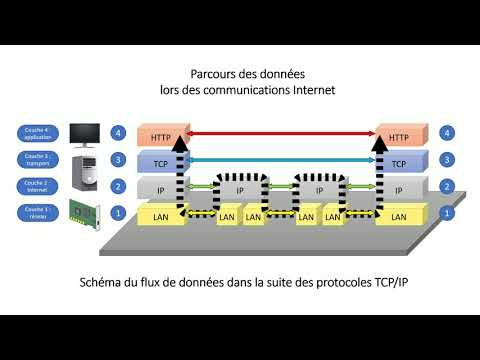

In [2]:
from IPython.display import YouTubeVideo
print('Le protocole TCP/IP')
YouTubeVideo('_0thnFumSdA')

### La couche 4 : Application

Contrairement au modèle OSI, les couches application, présentation et session sont unifiées dans une seule couche. Cette couche contient tous les protocoles de haut niveau (http, ftp, smtp...)
Les protocoles de cette couche décident quel protocole ils vont utiliser dans la couche inférieure: **TCP** ou **UDP**.

### La couche 3 : Transport

Son rôle est identique à celle du modèle OSI. Cette couche possède deux implémentations:

1. TCP (**T**ransmission **C**ontrol **P**rotocol) est un protocole **fiable** et **orienté connexion** (c'est à dire que les deux parties établissent une connexion avant l'échange de données). TCP permet:
  - l'**acheminement sans erreur** d'une machine à une autre;
  - sur la machine émettrice, la **fragmentation** des messages afin de les passer à la couche internet;
  - sur la machine réceptrice, la **reconstruction des paquets** et l'ordonnancement des paquets provenant de la couche réseau;
  - le **contrôle du flux** entre les machines éméttrice et réceptrice.


2. UDP (**U**ser **D**ataGram **P**rotocol) est plus simple que TCP puisqu'il est **non fiable** et **sans connexion**. UDP est utilisé quand il est nécessaire soit de transmettre des données très rapidement, et où la perte d'une partie de ces données n'a pas grande importance. UDP est utilisé pour le streaming vidéo ou la voix sur IP.

### La couche 2 : Internet

Cette couche est très importante puisqu'elle permet l'interconnexion des réseaux. Elle permet l'acheminement des paquets indépendamment les uns des autres : un paquet peut suivre une route différente d'un autre et l'ordre de départ n'est pas celui d'arrivée. Cette couche est importante dans le **routage**. Le protocole utilisé est le l'IP (**I**nternet **P**rotocol).

### La couche 1 : Réseau

Elle rassemble les couche 1 et 2 du modèle OSI et prend en charge plusieurs notions:

- Acheminement des données
- Format des données
- Conversion des signaux
- Contrôle d'erreurs à l'arivée

Une vidéo récapitulative du chapitre


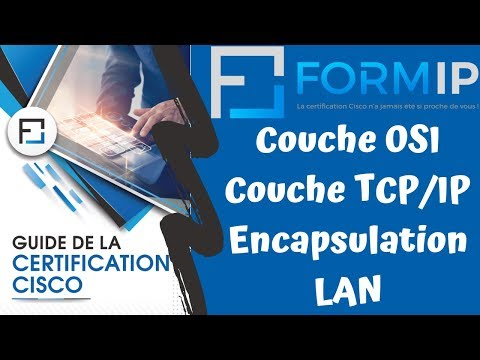

In [3]:
from IPython.display import YouTubeVideo
print('Une vidéo récapitulative du chapitre')
YouTubeVideo('t3NZsApAfQA')


## Webographie

- [Le modèle OSI sur frameip.com](https://www.frameip.com/osi/)
- [Le modèle TCP/IP sur frameip.com](https://www.frameip.com/tcpip/)

[Retour au sommaire](../index.ipynb)